In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
%matplotlib inline
#matplotlib.use('TkAgg')
import BPV
import pattern_manipulation as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
n = 100
N=15
#Wvalues = [0.005,0.008,0.01,0.012,0.015,0.02, 0.025]
#Wvalues = [0.005]
minW = 0.005
maxW = 0.035
Wsteps = 10
Wvalues = np.arange(minW,maxW,(maxW-minW)/Wsteps)

colnames = []
for W in Wvalues:
    colnames.append('W=%.3f' % (W))
df = BPV.Data()
df.read_csv("p.delviva.csv",False)
df.df.sort_index(by="p",inplace=True,ascending=True)
df.df.set_index(pd.Index([j for j in range(len(df.df))]), inplace=True)
df = df.data_head(n)
#df.df

In [22]:
firstiter = True
for W,col in zip(Wvalues,colnames):
    print("Solution for W={0}".format(W))
    
    prbl_pulp = BPV.BPV("pulp",df,N,W,time_solver=False)
    prbl_pulp.solve()
    prbl_pulp.pprint_solution()

    prbl_decH = BPV.BPV("decgraphH",df,N,W,time_solver=False)
    prbl_decH.solve()
    #cProfile.run('prbl.solve()',sort=1)
    prbl_decH.pprint_solution()
    
    prbl_decW = BPV.BPV("decgraphW",df,N,W,time_solver=False)
    prbl_decW.solve()
    #cProfile.run('prbl.solve()',sort=1)
    prbl_decW.pprint_solution()
    
    print("-----------------------------------")
    dec_visitlistH = prbl_decH.decgraph_len_visitlist
    dec_visitlistW = prbl_decW.decgraph_len_visitlist

    for i in range(n+1, len(dec_visitlistH),-1):
        dec_visitlistH.append(0)
    for i in range(n+1, len(dec_visitlistW),-1):
        dec_visitlistW.append(0)
    if firstiter:
        visitlistH=pd.DataFrame(dec_visitlistH, columns=[col])
        visitlistW=pd.DataFrame(dec_visitlistW, columns=[col])
        firstiter = False
    else:
        visitlistH[col] = dec_visitlistH
        visitlistW[col] = dec_visitlistW
        
visitlistH.to_pickle("/home/renato/tesi/code/plot2-lenvisitlist.visitlistH.pickle")
visitlistW.to_pickle("/home/renato/tesi/code/plot2-lenvisitlist.visitlistW.pickle")

Solution for W=0.005

Solver =  pulp 
Entropy =  0.025782167034014872 
Cardinality =  1 
Rate =  0.00483558994197

Solver =  decgraphH 
Entropy =  0.025782167034 
Cardinality =  1 
Rate =  0.00483558994197

Solver =  decgraphW 
Entropy =  0.025782167034 
Cardinality =  1 
Rate =  0.00483558994197
-----------------------------------
Solution for W=0.008

Solver =  pulp 
Entropy =  0.042977916394185564 
Cardinality =  2 
Rate =  0.00773694390716

Solver =  decgraphH 
Entropy =  0.0429779163942 
Cardinality =  2 
Rate =  0.00773694390716

Solver =  decgraphW 
Entropy =  0.0429779163942 
Cardinality =  2 
Rate =  0.00773694390716
-----------------------------------
Solution for W=0.011

Solver =  pulp 
Entropy =  0.06150248352289501 
Cardinality =  3 
Rate =  0.0109606705351

Solver =  decgraphH 
Entropy =  0.0615024835229 
Cardinality =  3 
Rate =  0.0109606705351

Solver =  decgraphW 
Entropy =  0.0615024835229 
Cardinality =  3 
Rate =  0.0109606705351
----------------------------------

In [6]:
visitlistH = pd.read_pickle("/home/renato/tesi/code/plot2-lenvisitlist.visitlistH.pickle")
visitlistW = pd.read_pickle("/home/renato/tesi/code/plot2-lenvisitlist.visitlistW.pickle")
#print(visitlistH,visitlistW)

    W=0.005
0         1
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
..      ...
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83        0
84        0
85        0
86        0
87        0
88        0
89        0
90        0
91        0
92        0
93        0
94        0
95        0
96        0
97        0
98        0

[99 rows x 1 columns]     W=0.005
0         1
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        0
14        0
15        0
16        0
17        0
18   

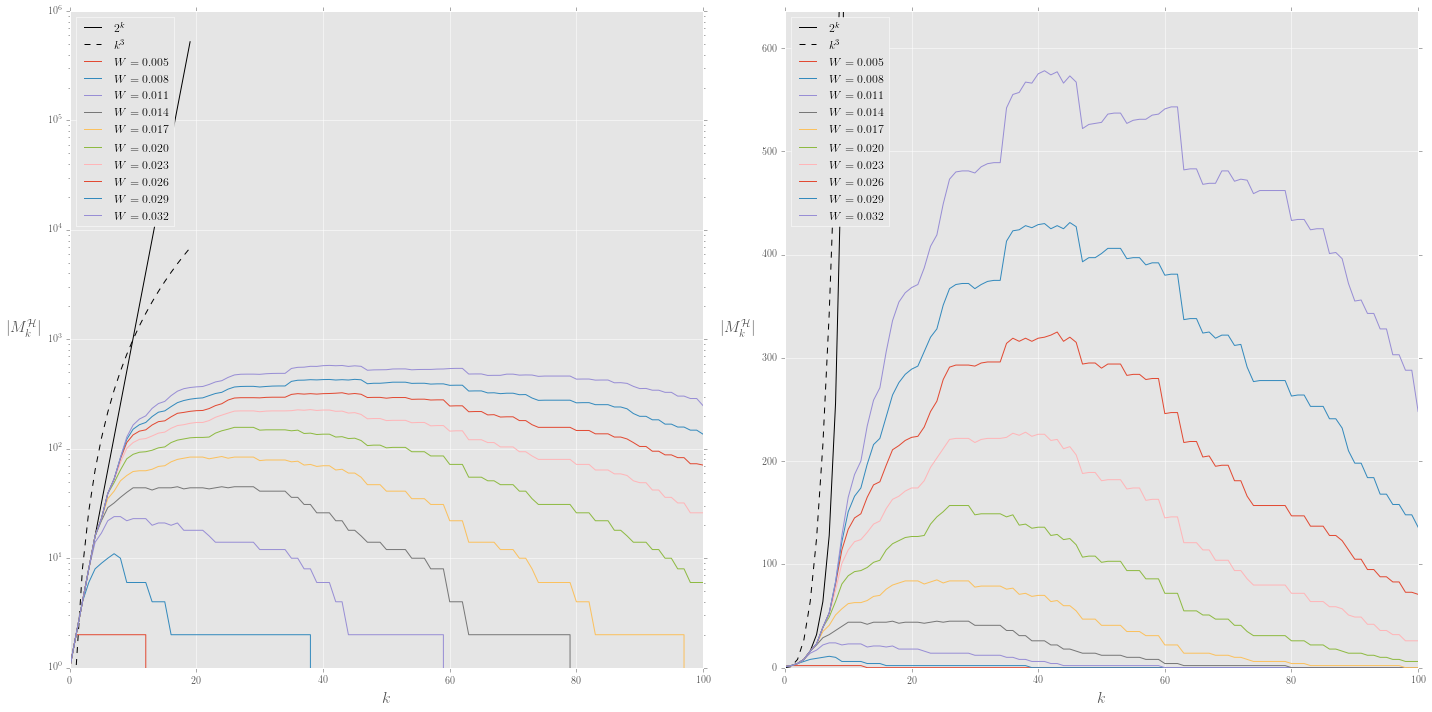

In [33]:
#fig, axes = plt.subplots(3,2,figsize=(12, 12), sharex='col', sharey='row')
#fig.subplots_adjust(hspace=0.1, wspace=0.05)
matplotlib.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
_dpi = 250
fig.dpi = _dpi
label_size = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
trange = np.arange(0,20,1,'int')

maxlen=0
for col in visitlistH.columns:
    maxlen = max(maxlen, max(visitlistH[col]))

plt.subplot(1, 2, 1)
#plt.ylim((0,maxlen*3))
plt.yscale('log')
plt.plot(trange,2**trange,'k',label='$2^k$')
plt.plot(trange,trange**3,'k--',label='$k^3$')
for col in visitlistH.columns:
    #ax.set_yscale('log')
    plt.plot(visitlistH[col], label='$'+col+'$')
    plt.legend(loc=2)
plt.xlabel(r'$k$',fontsize=label_size)
plt.ylabel(r'$|M_k^{\mathcal{H}}|$',rotation='horizontal', fontsize=label_size, horizontalalignment='right')


plt.subplot(1, 2, 2)
plt.ylim((0,maxlen*1.1))
plt.yscale('linear')
plt.plot(trange,2**trange,'k',label='$2^k$')
plt.plot(trange,trange**3,'k--',label='$k^3$')
for col in visitlistH.columns:
    #ax.set_yscale('log')
    plt.plot(visitlistH[col], label='$'+col+'$')
    plt.legend(loc=2)
plt.xlabel(r'$k$',fontsize=label_size)
plt.ylabel(r'$|M_k^{\mathcal{H}}|$',rotation='horizontal', fontsize=label_size, horizontalalignment='right')

plt.tight_layout()
#plt.savefig("/home/renato/tesi/testogit/img/bpv-lenvisitlist.png",dpi=_dpi,bbox_inches='tight')
plt.show()

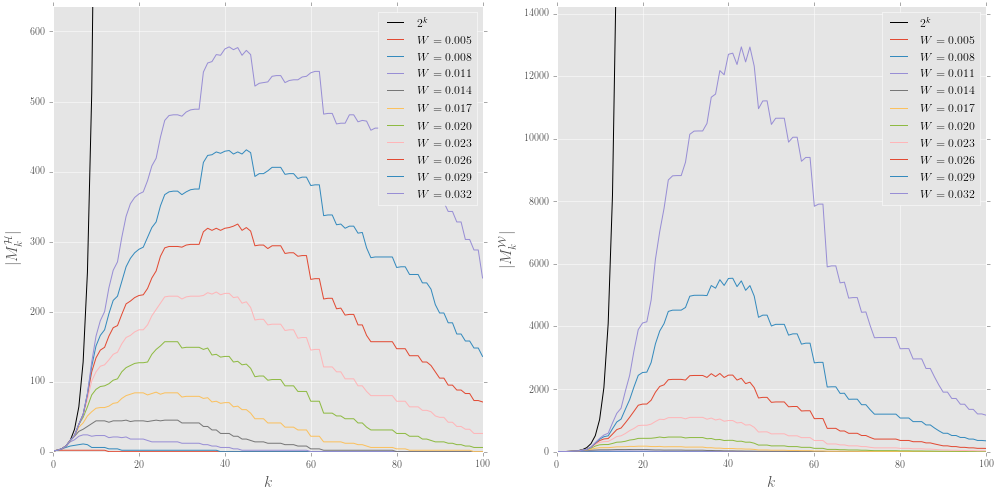

In [45]:
#fig, axes = plt.subplots(3,2,figsize=(12, 12), sharex='col', sharey='row')
#fig.subplots_adjust(hspace=0.1, wspace=0.05)
matplotlib.style.use('ggplot')

fig = plt.figure(figsize=(14,7))
ax = plt.gca()
_dpi = 250
fig.dpi = _dpi
label_size = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
trange = np.arange(0,20,1,'int')

plt.subplot(1, 2, 1)
maxlen=0
for col in visitlistH.columns:
    maxlen = max(maxlen, max(visitlistH[col]))
plt.ylim((0,maxlen*1.1))
plt.yscale('linear')
plt.plot(trange,2**trange,'k',label='$2^k$')
#plt.plot(trange,trange**3,'k--',label='$k^3$')
for col in visitlistH.columns:
    #ax.set_yscale('log')
    plt.plot(visitlistH[col], label='$'+col+'$')
    plt.legend(loc=1)
plt.xlabel(r'$k$',fontsize=label_size)
plt.ylabel(r'$|M_k^{\mathcal{H}}|$',rotation='vertical', fontsize=label_size, horizontalalignment='right')

plt.subplot(1, 2, 2)
maxlen=0
for col in visitlistW.columns:
    maxlen = max(maxlen, max(visitlistW[col]))
plt.ylim((0,maxlen*1.1))
plt.yscale('linear')
plt.plot(trange,2**trange,'k',label='$2^k$')
#plt.plot(trange,trange**3,'k--',label='$k^3$')
for col in visitlistW.columns:
    #ax.set_yscale('log')
    plt.plot(visitlistW[col], label='$'+col+'$')
    plt.legend(loc=1)
plt.xlabel(r'$k$',fontsize=label_size)
plt.ylabel(r'$|M_k^{\mathcal{W}}|$',rotation='vertical', fontsize=label_size, horizontalalignment='right')

plt.tight_layout()
plt.savefig("/home/renato/tesi/testogit/img/bpv-lenvisitlist.png",dpi=_dpi,bbox_inches='tight')
plt.show()

In [16]:
plt.savefig?